In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch import nn
from torch.utils.data import TensorDataset
import pandas as pd
import numpy as np

# Simple Linear word embedding

In [3]:
from torch.utils.data import Dataset, DataLoader


class CustomDataset(Dataset):
    def __init__(self, sentences, vocab, context_size=2):
        self.data = []
        for sentence in sentences:
            words = sentence.split()
            for i in range(len(words) - context_size):
                context = words[i : i + context_size]
                target = words[i + context_size]
                self.data.append(([vocab[word] for word in context], vocab[target]))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [4]:
# Define the vocabulary and sentences
vocab = {"PrincessMononoke": 0, "is": 1, "great": 2, "Suzume": 3}
sentences = ["PrincessMononoke is great", "Suzume is great"]

# Create the dataset
context_size = 1  # Number of words in the context
dataset = CustomDataset(sentences, vocab, context_size)

# Create the DataLoader for training and validation
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)
valid_loader = DataLoader(dataset, batch_size=1, shuffle=False)

# Example usage of the DataLoader
for inputs, targets in train_loader:
    print("Inputs:", inputs, "Targets:", targets)

Inputs: [tensor([0])] Targets: tensor([1])
Inputs: [tensor([3])] Targets: tensor([1])
Inputs: [tensor([1])] Targets: tensor([2])
Inputs: [tensor([1])] Targets: tensor([2])


In [5]:
from john_toolbox.train.simple_embedding.networks import SimpleWordEmbedding
from john_toolbox.train.simple_embedding.wrapper import DeepTrainer
import torch.optim as optim

In [6]:
# Example usage
vocab_size = len(vocab)
embed_dim = 2  # Each word encoded with 2 positions

model = SimpleWordEmbedding(vocab_size, embed_dim)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

wrapper = DeepTrainer(model, optimizer, criterion)

In [7]:
# Train the model
wrapper.fit(train_loader, epochs=3200, print_every_n_epochs=100)

# Evaluate the model
# test_loss = wrapper.evaluate(test_loader)

# Predict
# inputs = torch.tensor([vocab['PrincessMononoke'], vocab['Suzume']])
# predictions = wrapper.predict(inputs)

Epoch 0/3200 - Loss: 1.1754
Epoch 100/3200 - Loss: 0.7976
Epoch 200/3200 - Loss: 0.4742
Epoch 300/3200 - Loss: 0.2072
Epoch 400/3200 - Loss: 0.0920
Epoch 500/3200 - Loss: 0.0472
Epoch 600/3200 - Loss: 0.0273
Epoch 700/3200 - Loss: 0.0172
Epoch 800/3200 - Loss: 0.0115
Epoch 900/3200 - Loss: 0.0080
Epoch 1000/3200 - Loss: 0.0057
Epoch 1100/3200 - Loss: 0.0042
Epoch 1200/3200 - Loss: 0.0031
Epoch 1300/3200 - Loss: 0.0024
Epoch 1400/3200 - Loss: 0.0018
Epoch 1500/3200 - Loss: 0.0014
Epoch 1600/3200 - Loss: 0.0011
Epoch 1700/3200 - Loss: 0.0008
Epoch 1800/3200 - Loss: 0.0007
Epoch 1900/3200 - Loss: 0.0005
Epoch 2000/3200 - Loss: 0.0004
Epoch 2100/3200 - Loss: 0.0003
Epoch 2200/3200 - Loss: 0.0003
Epoch 2300/3200 - Loss: 0.0002
Epoch 2400/3200 - Loss: 0.0002
Epoch 2500/3200 - Loss: 0.0001
Epoch 2600/3200 - Loss: 0.0001
Epoch 2700/3200 - Loss: 0.0001
Epoch 2800/3200 - Loss: 0.0001
Epoch 2900/3200 - Loss: 0.0001
Epoch 3000/3200 - Loss: 0.0000
Epoch 3100/3200 - Loss: 0.0000


In [8]:
# Assuming the model has been trained already
# Let's retrieve the embeddings from the model
embeddings = wrapper.model.embeddings.data.cpu().detach().numpy()

# Mapping each word in the vocabulary to its corresponding embedding
word_embeddings = {word: embeddings[idx].tolist() for word, idx in vocab.items()}

In [9]:
df = pd.DataFrame(word_embeddings).T
df = df.reset_index()
df.columns = ["word", "x", "y"]

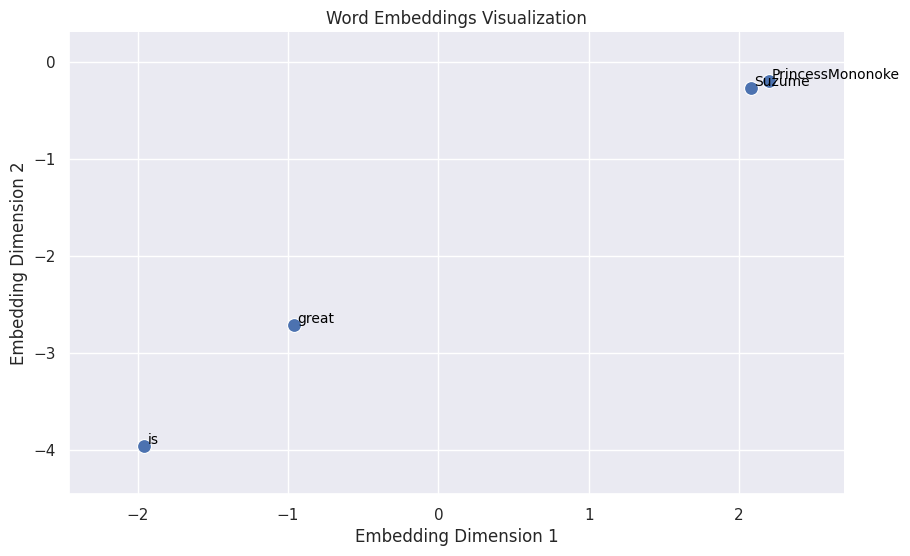

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")




# Create the plot with the Seaborn theme and improved aesthetics
plt.figure(figsize=(10, 6))
# Increase the size of the points
plot = sns.scatterplot(data=df, x="x", y="y", s=100)

# Add text with padding and adjust the properties for better visibility
for line in range(0, df.shape[0]):
    plot.text(
        df.x[line] + 0.02,
        df.y[line] + 0.02,
        df.word[line],
        horizontalalignment="left",
        size="small",
        color="black",
    )

plt.title("Word Embeddings Visualization")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")

# Adjust the limits of the plot to ensure no point is on the edge
plt.xlim(df.x.min() - 0.5, df.x.max() + 0.5)
plt.ylim(df.y.min() - 0.5, df.y.max() + 0.5)

# Remove the top and right spines for a cleaner look
sns.despine()

plt.show()

To obtain embeddings, which are vector representations of data, in the field of Natural Language Processing (NLP), image processing, or other types of data, several methods are used. Here are some of the most common methods:

1. **Word Embeddings for NLP**:
   - **Word2Vec**: This model generates word embeddings by learning to predict a word from its context (or vice versa) in a large text corpus.
   - **GloVe (Global Vectors for Word Representation)**: This method uses global word co-occurrence statistics from a corpus to generate embeddings.
   - **FastText**: Similar to Word2Vec, but capable of generating embeddings for out-of-vocabulary words using subwords or n-grams.

2. **Sentence Embeddings**:
   - **BERT (Bidirectional Encoder Representations from Transformers)**: This model generates sentence embeddings by considering the bidirectional context of words.
   - **GPT (Generative Pre-trained Transformer)**: Although primarily used for text generation, GPT can also be used to obtain sentence embeddings.

3. **Image Embeddings**:
   - **Convolutional Neural Networks (CNNs)**: Used for extracting features from images, these networks can produce image embeddings.
   - **Autoencoders**: Neural networks used to learn a compressed representation (embedding) of a dataset.

4. **Embeddings for Other Types of Data**:
   - **Graph Embeddings**: Used to represent nodes, edges, or entire graphs as vectors.
   - **Autoencoders for Structured Data**: Similar to their use in image processing, but adapted for structured data such as tables.

5. **Unsupervised Learning Techniques**:
   - **t-SNE (t-distributed Stochastic Neighbor Embedding)**: Primarily used for dimensionality reduction but can also be used to create embeddings.
   - **UMAP (Uniform Manifold Approximation and Projection)**: Another dimensionality reduction technique that can be used to obtain embeddings.

These methods can vary significantly depending on the type of data and the specific objective. Selecting an appropriate method depends on the characteristics of the data and the task at hand.

Word2Vec is a popular technique for generating word embeddings in the field of Natural Language Processing (NLP). It uses a neural network to learn word associations from a large text corpus. Word2Vec primarily offers two architectures for generating these embeddings:

1. **Continuous Bag-of-Words (CBOW)**:
   - In the CBOW architecture, the model predicts a target word from a set of context words.
   - For example, in the sentence "the cat eats food", if the target word is "eats", the model might use "the", "cat", "food" as context words.
   - CBOW is particularly effective for smaller datasets and is faster than the Skip-gram method.

2. **Skip-gram**:
   - In the Skip-gram architecture, the process is reversed compared to CBOW: the model uses a target word to predict context words.
   - Taking the previous example, if "eats" is the target word, the model will try to predict the words "the", "cat", "food".
   - Skip-gram works well with large datasets and is effective for learning representations of rare words.

In both cases, Word2Vec uses a shallow neural network to learn the embeddings. Each word in the vocabulary is initially represented by a random vector, and these vectors are adjusted through learning to capture the semantic and syntactic relationships between words.

The main difference between CBOW and Skip-gram lies in how context words and target words are used during training. CBOW is generally faster and yields better results for frequent words, while Skip-gram is slower but better suited for learning high-quality embeddings for less frequent words.